In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import psluncert
import numpy as np

# Simultaneous Resistance/Reactance/Impedance
## Example H2 from the GUM

This example demonstrates three simultaneous functions and loading raw measurement data from a CSV file. All the input parameters, including mean, standard uncertainty, degrees of freedom, and correlations are determined from the data points in IVdata.csv file.

In [11]:
# Load the raw data from a file. This data is from Table H.2 in GUM.
V, J, th = np.genfromtxt('IVdata.csv', delimiter=',', skip_header=1).T

In [12]:
# Three functions to calculate
R = 'V/J * cos(theta)'
X = 'V/J * sin(theta)'
Z = 'V/J'
u = psluncert.UncertCalc([R, X, Z])

In [13]:
k = np.sqrt(len(V))
# Note that numpy's std() function normalizes by N, not N-1! Use ddof=1.
u.set_input('V', nom=V.mean(), std=V.std(ddof=1)/k)
u.set_input('J', nom=J.mean(), std=J.std(ddof=1)/k)
u.set_input('theta', nom=th.mean(), std=th.std(ddof=1)/k)

# Use numpy to determine correlation coefficients, set matrix directly.
u.set_correlation(np.corrcoef(np.vstack((V, J, th))))

In [14]:
display(u.calculate())




Method            |Mean    |Standard Uncertainty 
------------------|--------|---------------------
GUM Approximation |127.732 |0.071                
Monte Carlo       |127.732 |0.071                




Method            |Mean   |Standard Uncertainty 
------------------|-------|---------------------
GUM Approximation |219.85 |0.30                 
Monte Carlo       |219.85 |0.30                 




Method            |Mean   |Standard Uncertainty 
------------------|-------|---------------------
GUM Approximation |254.26 |0.24                 
Monte Carlo       |254.26 |0.24                 



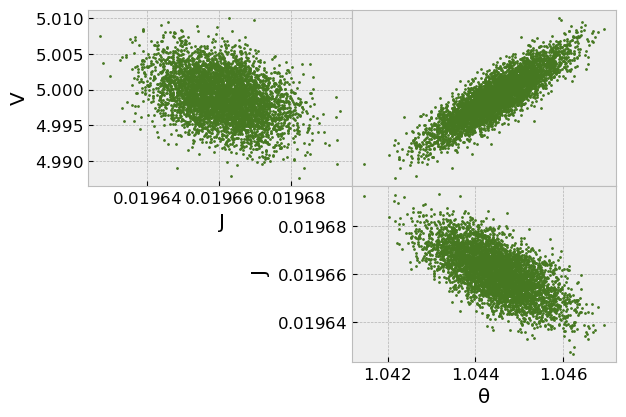

In [15]:
# Scatter plot will show the correlations between variables. Reducing number of points in scatter plot to speed up drawing.
u.out.plot_xscatter(points=5000);

In [16]:
u.out.report_expanded()



### GUM Approximation


Interval |Min     |Max     |k     |Deg. Freedom |Expanded Uncertainty 
---------|--------|--------|------|-------------|---------------------
99.00%   |127.55  |127.92  |2.576 |inf          |0.18                 
95.00%   |127.59  |127.87  |1.960 |inf          |0.14                 
90.00%   |127.62  |127.85  |1.645 |inf          |0.12                 
68.00%   |127.661 |127.803 |0.994 |inf          |0.071                

### Monte Carlo

Symmetric Coverage Intervals

Interval |Min     |Max     |k     
---------|--------|--------|------
99.00%   |127.549 |127.914 |2.575 
95.00%   |127.592 |127.871 |1.961 
90.00%   |127.615 |127.849 |1.644 
68.00%   |127.661 |127.803 |0.993 



### GUM Approximation


Interval |Min    |Max    |k     |Deg. Freedom |Expanded Uncertainty 
---------|-------|-------|------|-------------|---------------------
99.00%   |219.09 |220.61 |2.576 |inf          |0.76                 
95.00%   |219.27 |220.43 |1.960 |inf          |0.58                 
90.00%   |219.36 |220.33 |1.645 |inf          |0.49                 
68.00%   |219.55 |220.14 |0.994 |inf          |0.29                 

### Monte Carlo

Symmetric Coverage Intervals

Interval |Min    |Max    |k     
---------|-------|-------|------
99.00%   |219.09 |220.61 |2.577 
95.00%   |219.27 |220.43 |1.960 
90.00%   |219.36 |220.33 |1.645 
68.00%   |219.55 |220.14 |0.994 



### GUM Approximation


Interval |Min    |Max    |k     |Deg. Freedom |Expanded Uncertainty 
---------|-------|-------|------|-------------|---------------------
99.00%   |253.65 |254.87 |2.576 |inf          |0.61                 
95.00%   |253.80 |254.72 |1.960 |inf          |0.46                 
90.00%   |253.87 |254.65 |1.645 |inf          |0.39                 
68.00%   |254.02 |254.49 |0.994 |inf          |0.24                 

### Monte Carlo

Symmetric Coverage Intervals

Interval |Min    |Max    |k     
---------|-------|-------|------
99.00%   |253.65 |254.87 |2.575 
95.00%   |253.80 |254.72 |1.958 
90.00%   |253.87 |254.65 |1.645 
68.00%   |254.02 |254.49 |0.995 



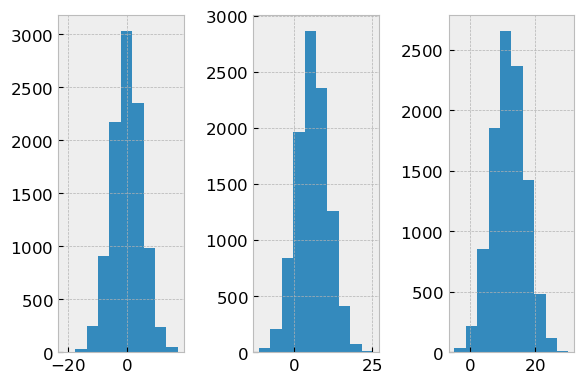

In [17]:
fig, ax = plt.subplots(ncols=3)
ax[0].hist(np.random.normal(loc=0, scale=5, size=10000));
ax[1].hist(np.random.normal(loc=6, scale=5, size=10000));
ax[2].hist(np.random.normal(loc=12, scale=5, size=10000));
fig.tight_layout()

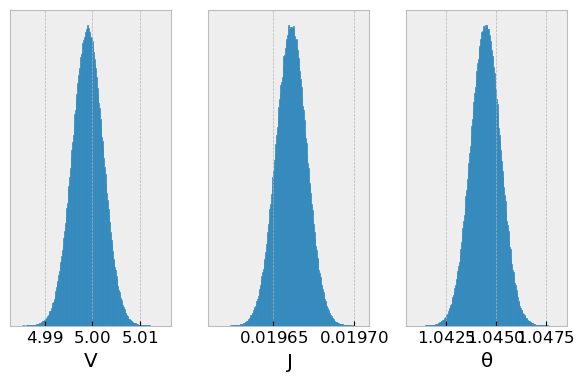

In [18]:
f = plt.figure(figsize=(6,4))
u.out.plot_xhists(fig=f)